In [ ]:
!pip install -U sentence-transformers scikit-learn umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
!pip install pandas numpy nltk spacy pymorphy3
# python -m spacy download ru_core_news_sm  # для русского
# python -m spacy download en_core_web_sm   # для английского

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 39.1 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
import torch

In [ ]:
df = pd.read_csv('/content/Reviews.csv', encoding='utf-8', engine='python')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
df = df[0:30_000]
print(df.shape)

(30000, 10)


In [ ]:
del df['Id']
del df['ProductId']
del df['UserId']
df = df.dropna().reset_index(drop=True)
df

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...
29993,"Anita L. Burnham ""Anita B""",1,1,5,1253750400,Gluten Free Goodness,This is the best gf bread mix I have found by ...
29994,Denise Estep,1,1,5,1252713600,GLUTEN FREE BREAD,THIS BREAD MIX IS THE CLOSEST THING TO REGULAR...
29995,"lovereading ""Gin""",1,1,5,1250208000,Pamela's bread mix,Delicious and easy to make. An excellent brea...
29996,"Jo ""Jo""",1,1,5,1248048000,Great bread!,"I bought this mix for my daughter's boyfriend,..."


In [ ]:
# import pandas as pd
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import pymorphy3
# from collections import Counter
# import spacy
# from tqdm import tqdm  # Добавляем импорт tqdm

# # Загрузка стоп-слов
# nltk.download('stopwords')
# nltk.download('punkt')

# # Добавляем для красивого отображения прогресса в pandas
# tqdm.pandas()

# class TextPreprocessor:
#     def __init__(self, language='eng', min_word_freq=5):
#         self.language = language
#         self.min_word_freq = min_word_freq
#         self.stop_words = set(stopwords.words(language))

#         self.spacy_nlp = spacy.load("en_core_web_sm")
#         self.frequent_words = set()

#     def identify_frequent_words(self, texts):
#         """Определение слишком частых слов"""
#         all_words = []
#         print("Сбор слов для анализа частотности...")
#         for text in tqdm(texts, desc="Анализ частотности слов"):
#             if pd.notna(text):
#                 words = re.findall(r'\b\w+\b', text.lower())
#                 all_words.extend(words)

#         word_counts = Counter(all_words)
#         self.frequent_words = {word for word, count in word_counts.items()
#                               if count >= self.min_word_freq}
#         return self.frequent_words

#     def clean_text(self, text):
#         """Основная функция очистки текста"""
#         if pd.isna(text):
#             return ""

#         # Приведение к нижнему регистру
#         text = text.lower()

#         # Удаление специальных символов и цифр
#         text = re.sub(r'[^а-яa-zё\s]', ' ', text)  # для русского + английского
#         text = re.sub(r'\d+', ' ', text)
#         text = re.sub(r'\s+', ' ', text).strip()

#         return text

#     def lemmatize_text(self, text):
#         """Лемматизация текста"""
#         if not text:
#             return ""

#         # Для английского используем spacy
#         doc = self.spacy_nlp(text)
#         lemmas = [token.lemma_ for token in doc
#                   if not token.is_stop and token.text not in self.frequent_words]
#         return ' '.join(lemmas)

#     def preprocess_dataframe(self, df, text_column):
#         """Полная предобработка датафрейма"""

#         # Копируем датафрейм
#         df_processed = df.copy()

#         # Определяем частые слова
#         print("Определение частых слов...")
#         texts = df_processed[text_column].dropna().tolist()
#         frequent_words = self.identify_frequent_words(texts)
#         print(f"Найдено {len(frequent_words)} частых слов")

#         # Очистка текста
#         print("Очистка текста...")
#         df_processed['cleaned_text'] = df_processed[text_column].progress_apply(self.clean_text)

#         # Лемматизация
#         print("Лемматизация...")
#         df_processed['lemmatized_text'] = df_processed['cleaned_text'].progress_apply(self.lemmatize_text)

#         # Удаление пустых текстов после обработки
#         df_processed = df_processed[df_processed['lemmatized_text'].str.len() > 0]

#         return df_processed

# # Инициализация препроцессора
# preprocessor = TextPreprocessor(language='english', min_word_freq=2)

# # Обработка данных
# df_processed = preprocessor.preprocess_dataframe(df, 'Text')

# print("Исходные данные:")
# print(df)
# print("\nОбработанные данные:")
# print(df_processed[['Text', 'lemmatized_text']])

In [ ]:
# df.to_csv('processed_text.csv')

In [ ]:
# df_processed = pd.read_csv('processed_text.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'processed_text.csv'

In [ ]:
# def subtract_one(x):
#     try:
#         return float(x) - 1
#     except (ValueError, TypeError):
#         return x  # оставляем как есть, если не число

# df_processed['Score'] = df_processed['Score'].apply(subtract_one)

In [ ]:
def subtract_one(x):
    try:
        return float(x) - 1
    except (ValueError, TypeError):
        return x  # оставляем как есть, если не число

df['Score'] = df['Score'].apply(subtract_one)

Кластеризация комментариев

In [ ]:
# df= df_processed.copy()

In [ ]:
df.Score.unique()

array([4., 0., 3., 1., 2.])

In [ ]:
df.to_csv('df_to_work.csv')

In [ ]:
df.Score.unique()

array([4., 0., 3., 1., 2.])

In [ ]:
df.Score.value_counts()

,count
Score,
4.0,18692
3.0,4374
0.0,2724
2.0,2493
1.0,1715


# BERT

In [ ]:
!pip install transformers torch pandas numpy scikit-learn matplotlib seaborn

In [ ]:
# device = torch.device('cpu')  # Временно используйте CPU
# model = model.to(device)

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from torch.optim import AdamW

class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [ ]:

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

class BERTClassifier:
    def __init__(self, num_classes=5, model_name='bert-base-uncased', df=None):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")

        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertForSequenceClassification.from_pretrained(
            model_name,
            num_labels=num_classes
        )
        self.model.resize_token_embeddings(len(self.tokenizer))


        self.class_weights = None
        if df is not None:
            self.class_weights = self._compute_class_weights(df)
            print(f"Class weights: {self.class_weights}")

        print('model ready')
        self.model = self.model.to(self.device)
        print('device done')
        self.num_classes = num_classes
        print('classes', self.num_classes)

    def _compute_class_weights(self, df, label_column='Score'):
        """Вычисление весов классов для балансировки"""
        from sklearn.utils.class_weight import compute_class_weight
        import numpy as np

        labels = df[label_column].values
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(labels),
            y=labels
        )
        return torch.tensor(class_weights, dtype=torch.float).to(self.device)


    def prepare_data(self, df, text_column='Text', label_column='Score'):
        """Подготовка данных для обучения с учетом устройств"""
        texts = df[text_column].values
        labels = df[label_column].values
        print('LABELS', labels)

        train_texts, val_texts, train_labels, val_labels = train_test_split(
            texts, labels, test_size=0.2, random_state=42, stratify=labels
        )

        print(f"Training samples: {len(train_texts)}")
        print(f"Validation samples: {len(val_texts)}")

        train_dataset = ReviewDataset(train_texts, train_labels, self.tokenizer)
        val_dataset = ReviewDataset(val_texts, val_labels, self.tokenizer)

        batch_size = 32
        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            pin_memory=True,
            num_workers=2
        )
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            pin_memory=True,
            num_workers=2
        )

        return train_loader, val_loader

    def train(self, train_loader, val_loader, epochs=100, learning_rate=2e-5):
        """Обучение модели с учетом дисбаланса"""
        print(f"Model device: {next(self.model.parameters()).device}")
        print(f"Target device: {self.device}")

        optimizer = AdamW(self.model.parameters(), lr=learning_rate)
        total_steps = len(train_loader) * epochs

        if self.class_weights is not None:
            criterion = torch.nn.CrossEntropyLoss(weight=self.class_weights)
            print("Using weighted CrossEntropyLoss")
        else:
            criterion = torch.nn.CrossEntropyLoss()
            print("Using standard CrossEntropyLoss")

        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=0,
            num_training_steps=total_steps
        )

        best_accuracy = 0
        training_stats = []

        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')
            print('-' * 50)

            self.model.train()
            total_train_loss = 0
            train_preds = []
            train_true = []

            for batch in tqdm(train_loader, desc='Training'):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                self.model.zero_grad()

                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )

                logits = outputs.logits
                loss = criterion(logits, labels)
                total_train_loss += loss.item()

                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                optimizer.step()
                scheduler.step()


                preds = torch.argmax(logits, dim=1)
                train_preds.extend(preds.cpu().numpy())
                train_true.extend(labels.cpu().numpy())

            avg_train_loss = total_train_loss / len(train_loader)
            train_accuracy = accuracy_score(train_true, train_preds)

            val_accuracy, avg_val_loss = self.evaluate(val_loader)


            training_stats.append({
                'epoch': epoch + 1,
                'train_loss': avg_train_loss,
                'train_accuracy': train_accuracy,
                'val_loss': avg_val_loss,
                'val_accuracy': val_accuracy
            })

            print(f'Train loss: {avg_train_loss:.4f}, Train accuracy: {train_accuracy:.4f}')
            print(f'Val loss: {avg_val_loss:.4f}, Val accuracy: {val_accuracy:.4f}')

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                torch.save(self.model.state_dict(), 'best_bert_model.pth')
                print('New best model saved!')

            print()

        return training_stats


    def evaluate(self, val_loader):
        """Валидация модели"""
        self.model.eval()
        total_val_loss = 0
        val_preds = []
        val_true = []
        if self.class_weights is not None:
            criterion = torch.nn.CrossEntropyLoss(weight=self.class_weights)
        else:
            criterion = torch.nn.CrossEntropyLoss()

        with torch.no_grad():
            for batch in tqdm(val_loader, desc='Validation'):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )


                logits = outputs.logits
                loss = criterion(logits, labels)
                total_val_loss += loss.item()

                preds = torch.argmax(logits, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_true.extend(labels.cpu().numpy())

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = accuracy_score(val_true, val_preds)

        return val_accuracy, avg_val_loss

    def predict(self, texts):
        """Предсказание для новых текстов"""
        self.model.eval()
        predictions = []
        probabilities = []

        with torch.no_grad():
            for text in texts:
                encoding = self.tokenizer.encode_plus(
                    text,
                    add_special_tokens=True,
                    max_length=128,
                    padding='max_length',
                    truncation=True,
                    return_attention_mask=True,
                    return_tensors='pt',
                )

                input_ids = encoding['input_ids'].to(self.device)
                attention_mask = encoding['attention_mask'].to(self.device)

                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask
                )

                logits = outputs.logits
                probs = torch.softmax(logits, dim=1).cpu().numpy()[0]
                pred = torch.argmax(logits, dim=1).cpu().numpy()[0]

                predictions.append(pred)
                probabilities.append(probs)

        return predictions, probabilities


Data sample:
   Unnamed: 0                      ProfileName  HelpfulnessNumerator  \
0           0                       delmartian                     1   
1           1                           dll pa                     0   
2           2  Natalia Corres "Natalia Corres"                     1   
3           3                             Karl                     3   
4           4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1    4.0  1303862400  Good Quality Dog Food   
1                       0    0.0  1346976000      Not as Advertised   
2                       1    3.0  1219017600  "Delight" says it all   
3                       3    1.0  1307923200         Cough Medicine   
4                       0    4.0  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrive

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Class weights: tensor([2.2025, 3.4983, 2.4066, 1.3717, 0.3210], device='cuda:0')
model ready
device done
classes 5
Preparing data...
LABELS [4. 0. 3. ... 4. 4. 4.]
Training samples: 23998
Validation samples: 6000
Training model...
Model device: cuda:0
Target device: cuda
Using weighted CrossEntropyLoss
Epoch 1/7
--------------------------------------------------


Validation: 100%|██████████| 188/188 [00:40<00:00,  4.59it/s]


Train loss: 1.1680, Train accuracy: 0.5906
Val loss: 0.9972, Val accuracy: 0.6898
New best model saved!

Epoch 2/7
--------------------------------------------------


Validation: 100%|██████████| 188/188 [00:40<00:00,  4.60it/s]


Train loss: 0.8940, Train accuracy: 0.6896
Val loss: 1.0355, Val accuracy: 0.6248

Epoch 3/7
--------------------------------------------------


Validation: 100%|██████████| 188/188 [00:40<00:00,  4.59it/s]


Train loss: 0.6904, Train accuracy: 0.7480
Val loss: 1.1192, Val accuracy: 0.6403

Epoch 4/7
--------------------------------------------------


Validation: 100%|██████████| 188/188 [00:41<00:00,  4.57it/s]


Train loss: 0.5255, Train accuracy: 0.7908
Val loss: 1.3198, Val accuracy: 0.7197
New best model saved!

Epoch 5/7
--------------------------------------------------


Validation: 100%|██████████| 188/188 [00:40<00:00,  4.59it/s]


Train loss: 0.3899, Train accuracy: 0.8272
Val loss: 1.3986, Val accuracy: 0.6632

Epoch 6/7
--------------------------------------------------


Validation: 100%|██████████| 188/188 [00:40<00:00,  4.62it/s]


Train loss: 0.3007, Train accuracy: 0.8592
Val loss: 1.5673, Val accuracy: 0.7128

Epoch 7/7
--------------------------------------------------


Validation: 100%|██████████| 188/188 [00:40<00:00,  4.61it/s]


Train loss: 0.2407, Train accuracy: 0.8821
Val loss: 1.6174, Val accuracy: 0.7065



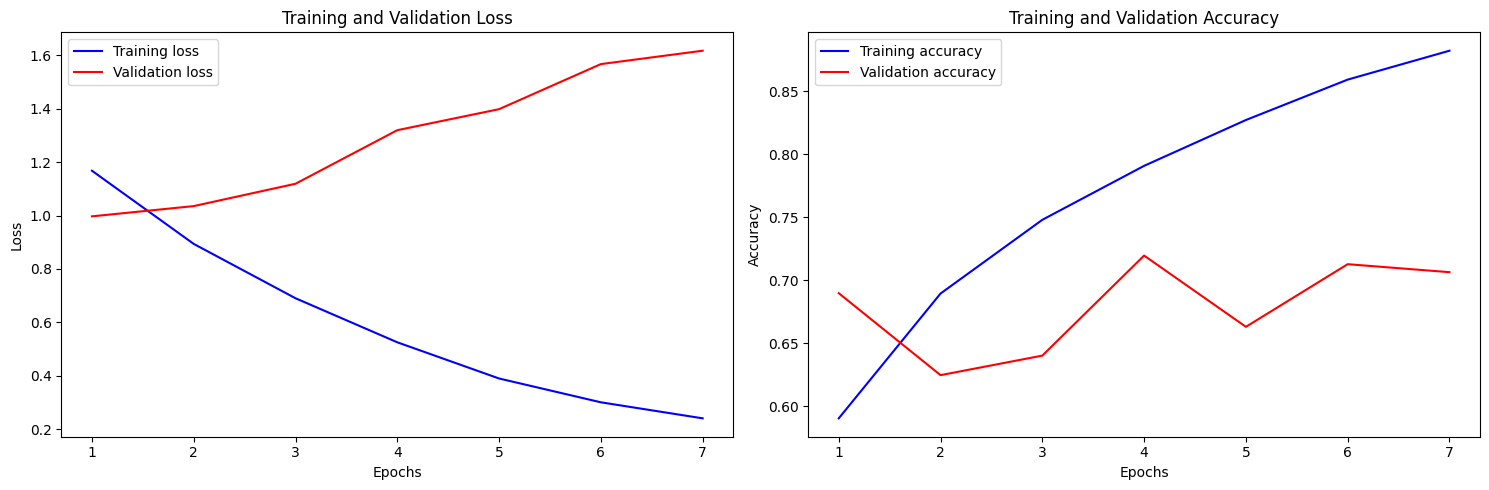

In [ ]:


def plot_training_stats(stats):
    """Визуализация процесса обучения"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loss
    epochs = [s['epoch'] for s in stats]
    train_loss = [s['train_loss'] for s in stats]
    val_loss = [s['val_loss'] for s in stats]

    ax1.plot(epochs, train_loss, 'b-', label='Training loss')
    ax1.plot(epochs, val_loss, 'r-', label='Validation loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Accuracy
    train_acc = [s['train_accuracy'] for s in stats]
    val_acc = [s['val_accuracy'] for s in stats]

    ax2.plot(epochs, train_acc, 'b-', label='Training accuracy')
    ax2.plot(epochs, val_acc, 'r-', label='Validation accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.savefig('training_stats.png')
    plt.show()


def main():

    df = pd.read_csv('df_to_work.csv')

    print("Data sample:")
    print(df.head())
    print(f"\nTotal samples: {len(df)}")
    print(f"Number of clusters: {df['Score'].nunique()}")

    print("Initializing BERT classifier...")
    classifier = BERTClassifier(num_classes=len(df['Score'].unique()), df=df)


    print("Preparing data...")
    train_loader, val_loader = classifier.prepare_data(df)

    print("Training model...")
    training_stats = classifier.train(train_loader, val_loader, epochs=7)

    plot_training_stats(training_stats)


if __name__ == "__main__":
    main()

In [ ]:
 # df_balanced.cluster.value_counts()

In [ ]:
from collections import Counter
import re

def get_cluster_keywords(texts, clusters, n_keywords=10):
    cluster_keywords = {}
    for cluster_id in set(clusters):
        cluster_texts = [text for text, cl in zip(texts, clusters) if cl == cluster_id]
        all_words = ' '.join(cluster_texts).lower()
        words = re.findall(r'\w+', all_words)
        word_counts = Counter(words)
        cluster_keywords[cluster_id] = word_counts.most_common(n_keywords)
    return cluster_keywords

keywords = get_cluster_keywords(df.lemmatized_text, df.Score)
for cluster_id, words in keywords.items():
    print(f"Кластер {cluster_id}: {[word for word, count in words]}")

In [ ]:
df[['lemmatized_text', 'cluster']].to_excel('dd.xlsx')

С обработкой

In [ ]:

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

class BERTClassifier:
    def __init__(self, num_classes=5, model_name='bert-base-uncased', df=None):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")

        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertForSequenceClassification.from_pretrained(
            model_name,
            num_labels=num_classes
        )
        self.model.resize_token_embeddings(len(self.tokenizer))


        self.class_weights = None
        if df is not None:
            self.class_weights = self._compute_class_weights(df)
            print(f"Class weights: {self.class_weights}")

        print('model ready')
        self.model = self.model.to(self.device)
        print('device done')
        self.num_classes = num_classes
        print('classes', self.num_classes)

    def _compute_class_weights(self, df, label_column='Score'):
        """Вычисление весов классов для балансировки"""
        from sklearn.utils.class_weight import compute_class_weight
        import numpy as np

        labels = df[label_column].values
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(labels),
            y=labels
        )
        return torch.tensor(class_weights, dtype=torch.float).to(self.device)


    def prepare_data(self, df, text_column='lemmatized_text', label_column='Score'):
        """Подготовка данных для обучения с учетом устройств"""
        texts = df[text_column].values
        labels = df[label_column].values
        print('LABELS', labels)

        train_texts, val_texts, train_labels, val_labels = train_test_split(
            texts, labels, test_size=0.2, random_state=42, stratify=labels
        )

        print(f"Training samples: {len(train_texts)}")
        print(f"Validation samples: {len(val_texts)}")

        train_dataset = ReviewDataset(train_texts, train_labels, self.tokenizer)
        val_dataset = ReviewDataset(val_texts, val_labels, self.tokenizer)

        batch_size = 16
        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            pin_memory=True,
            num_workers=2
        )
        val_loader = DataLoader(
            val_dataset,
            batch_size=batch_size,
            shuffle=False,
            pin_memory=True,
            num_workers=2
        )

        return train_loader, val_loader

    def train(self, train_loader, val_loader, epochs=100, learning_rate=2e-5):
        """Обучение модели с учетом дисбаланса"""
        print(f"Model device: {next(self.model.parameters()).device}")
        print(f"Target device: {self.device}")

        optimizer = AdamW(self.model.parameters(), lr=learning_rate)
        total_steps = len(train_loader) * epochs

        if self.class_weights is not None:
            criterion = torch.nn.CrossEntropyLoss(weight=self.class_weights)
            print("Using weighted CrossEntropyLoss")
        else:
            criterion = torch.nn.CrossEntropyLoss()
            print("Using standard CrossEntropyLoss")

        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=0,
            num_training_steps=total_steps
        )

        best_accuracy = 0
        training_stats = []

        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')
            print('-' * 50)

            self.model.train()
            total_train_loss = 0
            train_preds = []
            train_true = []

            for batch in tqdm(train_loader, desc='Training'):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                self.model.zero_grad()

                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )

                logits = outputs.logits
                loss = criterion(logits, labels)
                total_train_loss += loss.item()

                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                optimizer.step()
                scheduler.step()


                preds = torch.argmax(logits, dim=1)
                train_preds.extend(preds.cpu().numpy())
                train_true.extend(labels.cpu().numpy())

            avg_train_loss = total_train_loss / len(train_loader)
            train_accuracy = accuracy_score(train_true, train_preds)

            val_accuracy, avg_val_loss = self.evaluate(val_loader)


            training_stats.append({
                'epoch': epoch + 1,
                'train_loss': avg_train_loss,
                'train_accuracy': train_accuracy,
                'val_loss': avg_val_loss,
                'val_accuracy': val_accuracy
            })

            print(f'Train loss: {avg_train_loss:.4f}, Train accuracy: {train_accuracy:.4f}')
            print(f'Val loss: {avg_val_loss:.4f}, Val accuracy: {val_accuracy:.4f}')

            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                torch.save(self.model.state_dict(), 'best_bert_model.pth')
                print('New best model saved!')

            print()

        return training_stats


    def evaluate(self, val_loader):
        """Валидация модели"""
        self.model.eval()
        total_val_loss = 0
        val_preds = []
        val_true = []
        if self.class_weights is not None:
            criterion = torch.nn.CrossEntropyLoss(weight=self.class_weights)
        else:
            criterion = torch.nn.CrossEntropyLoss()

        with torch.no_grad():
            for batch in tqdm(val_loader, desc='Validation'):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )


                logits = outputs.logits
                loss = criterion(logits, labels)
                total_val_loss += loss.item()

                preds = torch.argmax(logits, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_true.extend(labels.cpu().numpy())

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = accuracy_score(val_true, val_preds)

        return val_accuracy, avg_val_loss

    def predict(self, texts):
        """Предсказание для новых текстов"""
        self.model.eval()
        predictions = []
        probabilities = []

        with torch.no_grad():
            for text in texts:
                encoding = self.tokenizer.encode_plus(
                    text,
                    add_special_tokens=True,
                    max_length=128,
                    padding='max_length',
                    truncation=True,
                    return_attention_mask=True,
                    return_tensors='pt',
                )

                input_ids = encoding['input_ids'].to(self.device)
                attention_mask = encoding['attention_mask'].to(self.device)

                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask
                )

                logits = outputs.logits
                probs = torch.softmax(logits, dim=1).cpu().numpy()[0]
                pred = torch.argmax(logits, dim=1).cpu().numpy()[0]

                predictions.append(pred)
                probabilities.append(probs)

        return predictions, probabilities


Data sample:
   Unnamed: 0.1  Unnamed: 0                      ProfileName  \
0             0           2  Natalia Corres "Natalia Corres"   
1             1           6                David C. Sullivan   
2             2          18                          Wolfee1   
3             3          21                   Tammy Anderson   
4             4          25     Deborah S. Linzer "Cat Lady"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1    3.0  1219017600   
1                     0                       0    4.0  1340150400   
2                     0                       0    4.0  1324598400   
3                     0                       0    4.0  1308960000   
4                     0                       0    4.0  1288310400   

                                         Summary  \
0                          "Delight" says it all   
1  Great!  Just as good as the expensive brands!   
2                        

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Class weights: tensor([1.8561, 3.4660, 2.2619, 1.3724, 0.3331], device='cuda:0')
model ready
device done
classes 5
Preparing data...
LABELS [3. 4. 4. ... 4. 4. 3.]
Training samples: 8152
Validation samples: 2038
Training model...
Model device: cuda:0
Target device: cuda
Using weighted CrossEntropyLoss
Epoch 1/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.77it/s]


Train loss: 1.6148, Train accuracy: 0.2651
Val loss: 1.6071, Val accuracy: 0.6001
New best model saved!

Epoch 2/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.88it/s]


Train loss: 1.6078, Train accuracy: 0.3292
Val loss: 1.6067, Val accuracy: 0.3199

Epoch 3/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.77it/s]


Train loss: 1.5741, Train accuracy: 0.3409
Val loss: 1.6214, Val accuracy: 0.2596

Epoch 4/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.82it/s]


Train loss: 1.4103, Train accuracy: 0.3795
Val loss: 1.7423, Val accuracy: 0.2645

Epoch 5/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.86it/s]


Train loss: 1.0882, Train accuracy: 0.4690
Val loss: 2.1131, Val accuracy: 0.2812

Epoch 6/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.85it/s]


Train loss: 0.7912, Train accuracy: 0.5828
Val loss: 2.4217, Val accuracy: 0.2890

Epoch 7/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.74it/s]


Train loss: 0.5677, Train accuracy: 0.6839
Val loss: 2.8491, Val accuracy: 0.3543

Epoch 8/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.83it/s]


Train loss: 0.4416, Train accuracy: 0.7583
Val loss: 3.0884, Val accuracy: 0.3734

Epoch 9/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.82it/s]


Train loss: 0.3307, Train accuracy: 0.8073
Val loss: 3.3914, Val accuracy: 0.4244

Epoch 10/10
--------------------------------------------------


Validation: 100%|██████████| 128/128 [00:14<00:00,  8.84it/s]


Train loss: 0.2846, Train accuracy: 0.8383
Val loss: 3.4472, Val accuracy: 0.4185



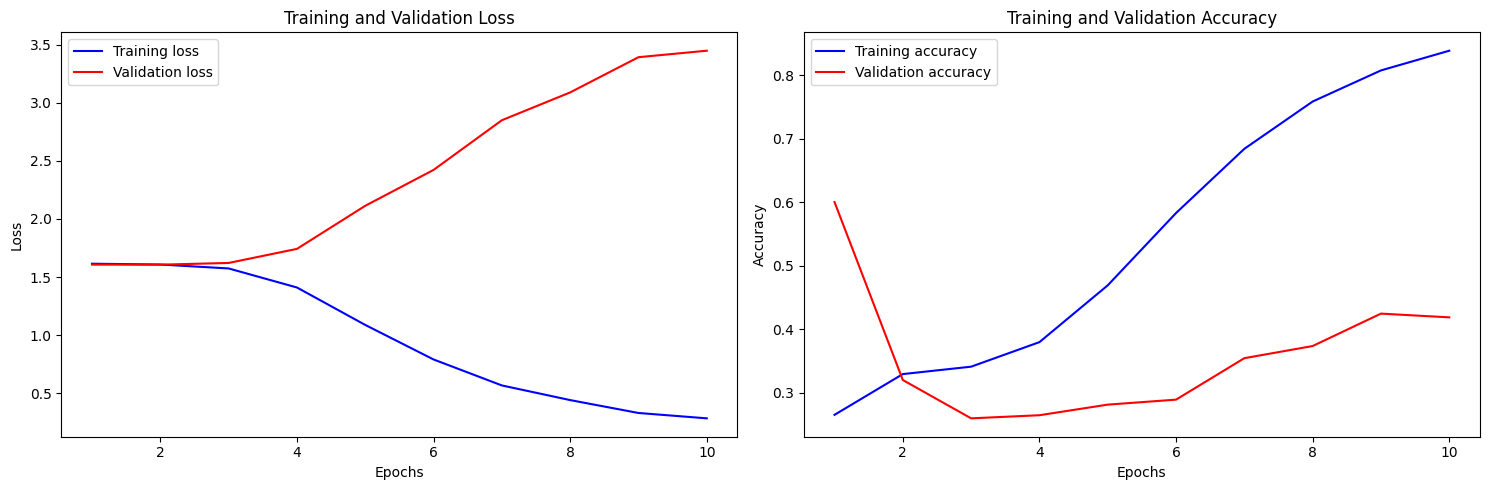

In [ ]:

def plot_training_stats(stats):
    """Визуализация процесса обучения"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loss
    epochs = [s['epoch'] for s in stats]
    train_loss = [s['train_loss'] for s in stats]
    val_loss = [s['val_loss'] for s in stats]

    ax1.plot(epochs, train_loss, 'b-', label='Training loss')
    ax1.plot(epochs, val_loss, 'r-', label='Validation loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Accuracy
    train_acc = [s['train_accuracy'] for s in stats]
    val_acc = [s['val_accuracy'] for s in stats]

    ax2.plot(epochs, train_acc, 'b-', label='Training accuracy')
    ax2.plot(epochs, val_acc, 'r-', label='Validation accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.savefig('training_stats.png')
    plt.show()


def main():

    df = pd.read_csv('df_to_work.csv')

    print("Data sample:")
    print(df.head())
    print(f"\nTotal samples: {len(df)}")
    print(f"Number of clusters: {df['Score'].nunique()}")

    print("Initializing BERT classifier...")
    classifier = BERTClassifier(num_classes=len(df['Score'].unique()), df=df)


    print("Preparing data...")
    train_loader, val_loader = classifier.prepare_data(df)

    print("Training model...")
    training_stats = classifier.train(train_loader, val_loader, epochs=10)

    plot_training_stats(training_stats)


if __name__ == "__main__":
    main()